In [2]:
import tensorflow as tf 
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib

In [3]:
!pwd

/Users/emi/code/emi-mari/kids-n-tech/streamlit_classifier


In [4]:
data_dir = "../streamlit_classifier/Rice_Image_Dataset"
data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

PosixPath('../streamlit_classifier/Rice_Image_Dataset')

In [5]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

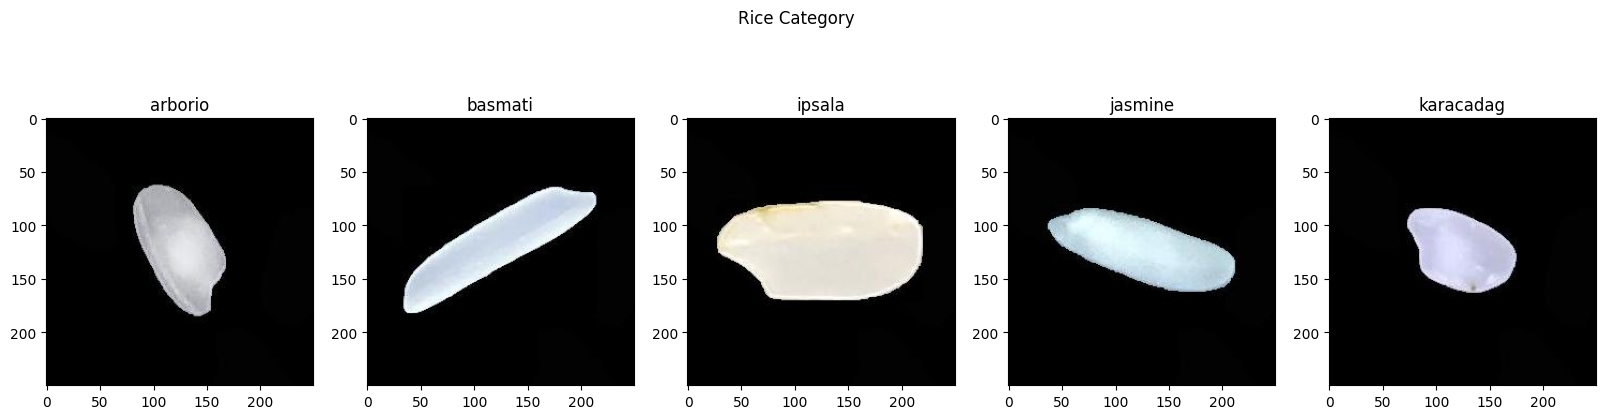

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [6]:
df_images = {'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag}

df_labels = {'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4}

In [5]:
X, y, image_name = [], [], []

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img) 
        y.append(df_labels[label])
        image_name.append(image)

In [6]:
X = np.array(X)
X = X/255
y = np.array(y)

In [7]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [8]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False)

In [9]:
num_label = 5

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [11]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5


2023-06-03 08:00:47.836679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


71/71 [==============================] - 18s 225ms/step - loss: 0.6953 - acc: 0.7884 - val_loss: 0.2287 - val_acc: 0.9681
Epoch 2/5
71/71 [==============================] - 16s 219ms/step - loss: 0.1908 - acc: 0.9658 - val_loss: 0.1248 - val_acc: 0.9894
Epoch 3/5
71/71 [==============================] - 16s 221ms/step - loss: 0.1286 - acc: 0.9747 - val_loss: 0.0809 - val_acc: 0.9947
Epoch 4/5
71/71 [==============================] - 16s 224ms/step - loss: 0.0989 - acc: 0.9769 - val_loss: 0.0636 - val_acc: 0.9947
Epoch 5/5
71/71 [==============================] - 15s 211ms/step - loss: 0.0812 - acc: 0.9844 - val_loss: 0.0641 - val_acc: 0.9894


In [12]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 4s 198ms/step - loss: 0.0990 - acc: 0.9680


[0.09902316331863403, 0.9679715037345886]

In [13]:
model.save('rice_model.tf')

INFO:tensorflow:Assets written to: rice_model.tf/assets


INFO:tensorflow:Assets written to: rice_model.tf/assets


In [7]:
model = tf.keras.models.load_model('rice_model.tf')

In [21]:
def preprocess_image(image):
    
    if image.shape != (224, 224, 3):
        resized_img = cv2.resize(image, (224, 224))
        resized_img = np.array(resized_img)
        resized_img = resized_img/255.0
        resized_img = np.expand_dims(resized_img, axis=0)
    else:
        resized_img = np.array(image)
        resized_img = resized_img/255.0
        resized_img = np.expand_dims(resized_img, axis=0)
    
    return resized_img

In [9]:
buffer = "../streamlit_classifier/Rice_Image_Dataset/Arborio/Arborio (1).jpg"

In [10]:
image = Image.open(buffer)
image_array = np.array(image)

In [22]:
img = preprocess_image(image_array)

In [26]:
y_pred = model.predict(img)

2023-06-04 18:26:09.813728: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 299ms/step


In [27]:
y_pred

array([[ 5.2351913 , -5.7019296 , -3.3556137 , -0.3793045 ,  0.06571489]],
      dtype=float32)

In [35]:
df_labels = {0 : 'arborio',
             1 : 'basmati',
             2 : 'ipsala',
             3 : 'jasmine',
             4 : 'karacadag'}

In [33]:
label_indx = np.argmax(y_pred)
label_indx

0

In [37]:
df_labels[label_indx]

'arborio'